<a href="https://colab.research.google.com/github/haroldavis/Work_First_Colab/blob/main/clean_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My first Colab

I will use Colab for class about data clean, following my path of Data Science. 🥳

#I import libraries for my workspace

In [1]:
import numpy as np
import pandas as pd

#I import tools of google

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I initial my dataset with _imdb_

In [3]:
imdb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clase 1 - Limpieza datos/datasets/IMDB.csv')

#Create a copy for start to manipulate the dataset

In [4]:
imdb2 = imdb.copy()

In [ ]:
#I check to first info of dataset
imdb2.info()#I have 97 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 86 non-null     object 
 1   director_name         86 non-null     object 
 2   duration              97 non-null     int64  
 3   gross                 89 non-null     float64
 4   genres                96 non-null     object 
 5   movie_title           97 non-null     object 
 6   title_year            97 non-null     int64  
 7   language              97 non-null     object 
 8   country               97 non-null     object 
 9   budget                93 non-null     float64
 10  imdb_score            97 non-null     float64
 11  actors                97 non-null     object 
 12  movie_facebook_likes  97 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ KB


In [5]:
#I check if there are row duplicate
len(imdb2[imdb2.duplicated()])
#I check wich are there
imdb2[imdb2.duplicated()]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
20,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
29,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
51,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
53,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
61,Color,Timur Bekmambetov,141,NaN,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0


In [6]:
#I delete the row duplicate
imdb2.drop_duplicates(inplace=True)

In [ ]:
#I do the preview for see the changes
imdb2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 96
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 80 non-null     object 
 1   director_name         80 non-null     object 
 2   duration              91 non-null     int64  
 3   gross                 84 non-null     float64
 4   genres                90 non-null     object 
 5   movie_title           91 non-null     object 
 6   title_year            91 non-null     int64  
 7   language              91 non-null     object 
 8   country               91 non-null     object 
 9   budget                87 non-null     float64
 10  imdb_score            91 non-null     float64
 11  actors                91 non-null     object 
 12  movie_facebook_likes  91 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.0+ KB


In [7]:
#Reset the index after the changes
imdb2.reset_index(drop=True, inplace=True)

In [ ]:
imdb2.info()

#I check the nulls in the dataset, first i create a copy

In [8]:
imdb3 = imdb2.copy()

In [9]:
#Show the nulls in the columns
imdb3.isnull().sum()

color                   11
director_name           11
duration                 0
gross                    7
genres                   1
movie_title              0
title_year               0
language                 0
country                  0
budget                   4
imdb_score               0
actors                   0
movie_facebook_likes     0
dtype: int64

In [10]:
#I use "value_counts" metod for i see the data numbers by color
imdb3['color'].value_counts()
#Also i can use "normalize" inside "value_counts"
imdb3['color'].value_counts(normalize=True)

color
Color               0.9750
color               0.0125
 Black and White    0.0125
Name: proportion, dtype: float64

In [11]:
#I delete color column because all data of columns is same
del(imdb3['color'])

In [ ]:
imdb3.info()

In [12]:
imdb3['director_name'].value_counts()

director_name
Michael Bay          3
Peter Jackson        3
Christopher Nolan    3
Ridley Scott         3
Martin Scorsese      2
                    ..
Shane Black          1
Adam McKay           1
Zack Snyder          1
Baz Luhrmann         1
Clint Eastwood       1
Name: count, Length: 61, dtype: int64

In [13]:
#I check the nulls in "director_name" column and evaluate with other columns
imdb3[imdb3['director_name'].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
5,NaN,183,330249062.0,Action|Adventure|Sci-Fi,Batman v Superman: Dawn of Justice,202,English,USA,250000000.0,6.9,"Henry Cavill,Lauren Cohan,Alan D. Purwin",197000
21,NaN,156,183635922.0,Adventure|Drama|Thriller|Western,The Revenant,2015,English,USA,135000000.0,8.1,"Leonardo DiCaprio,Tom Hardy,Lukas Haas",190000
27,NaN,150,182204440.0,Biography|Drama|History|War,Lincoln,2012,English,USA,65000000.0,7.4,"Joseph Gordon-Levitt,Hal Holbrook,Bruce McGill",71000
36,NaN,147,407197282.0,Action|Adventure|Sci-Fi,Captain America: Civil War,2016,English,USA,250000000.0,8.2,"Robert Downey Jr.,Scarlett Johansson,Chris Evans",72000
49,NaN,143,NaN,Drama|Horror|Thriller,The Ridges,2011,English,USA,17350.0,3.0,"Robbie Barnes,Alana Kaniewski,Brandon Landers",33
52,NaN,142,407999255.0,Adventure|Drama|Sci-Fi|Thriller,The Hunger Games,2012,English,USA,78000000.0,7.3,"Jennifer Lawrence,Josh Hutcherson,Anthony Reyn...",140000
63,NaN,139,150832203.0,Adventure|Mystery|Sci-Fi,Divergent,2014,English,USA,85000000.0,6.7,"Kate Winslet,Theo James,Mekhi Phifer",49000
67,NaN,138,150117807.0,Crime|Drama,American Hustle,2013,English,USA,40000000.0,7.3,"Jennifer Lawrence,Christian Bale,Bradley Cooper",63000
74,NaN,137,37304950.0,Biography|Crime|Drama,J. Edgar,2011,English,USA,35000000.0,6.6,"Leonardo DiCaprio,Naomi Watts,Kaitlyn Dever",16000
76,NaN,137,281666058.0,Adventure|Sci-Fi,The Hunger Games: Mockingjay - Part 2,2015,English,USA,160000000.0,6.6,"Jennifer Lawrence,Philip Seymour Hoffman,Josh ...",38000


In [14]:
#Replacement the nulls for "no_director", i use inplace for save changes
imdb3['director_name'].fillna('no_director', inplace=True)

In [15]:
#I check that changes is aplicated
imdb3['director_name'].value_counts()

director_name
no_director          11
Michael Bay           3
Peter Jackson         3
Christopher Nolan     3
Ridley Scott          3
                     ..
Shane Black           1
Adam McKay            1
Zack Snyder           1
Baz Luhrmann          1
Clint Eastwood        1
Name: count, Length: 62, dtype: int64

array([[<Axes: title={'center': 'gross'}>]], dtype=object)

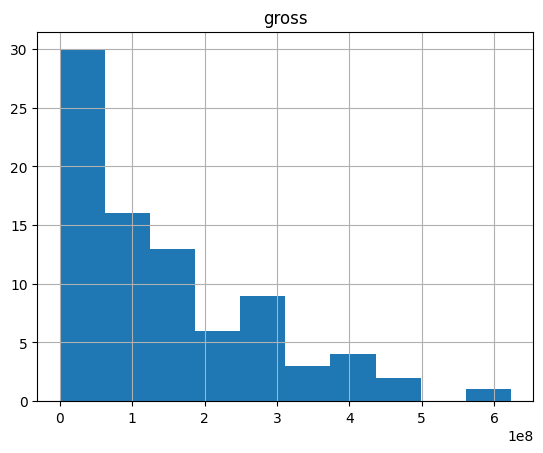

In [16]:
#Previewed your histogram for i see distribution of data
imdb3.hist('gross')

In [ ]:
imdb3[imdb3['gross']>5e8]

In [ ]:
#I check the nulls
imdb3[imdb3['gross'].isnull()]

In [17]:
#I create a variable "media_imdb3" that is the average about "gross" column
media_imdb3 = imdb3['gross'].mean()
media_imdb3

147788551.60714287

#For my **gros** column, i will replacement nulls by the average of this column contain in the variable "media_imdb3". I create new copy

In [18]:
imdb4 = imdb3.copy()

In [19]:
#Replacement nulls by "media_imdb3"
imdb4['gross'].fillna(media_imdb3, inplace=True)

<Axes: >

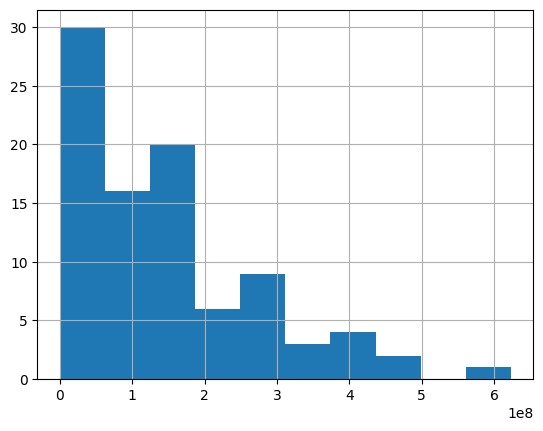

In [20]:
#I compare my histogram "imdb4" with "imfb3" for my 'gross' column
imdb4['gross'].hist()

#For my **genres** column, i see only one null, i will delete

In [23]:
imdb4[imdb4['genres'].isnull()]

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes


In [22]:
#Delete the row that contain null
imdb4.dropna(subset=['genres'], inplace=True)

In [ ]:
imdb4.info()

#For **budget** column i will replacement nulls by median

In [24]:
mediana = imdb3['budget'].median()

In [25]:
imdb5 = imdb4.copy()

In [26]:
imdb5['budget'].fillna(mediana, inplace=True)

In [ ]:
imdb5.info()

#After of work about nulls, now i check the logic about the variables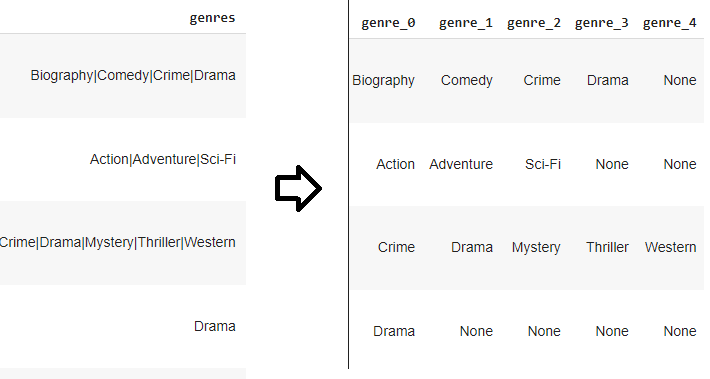

#For **duration** column, i see the histogram and i inspect

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

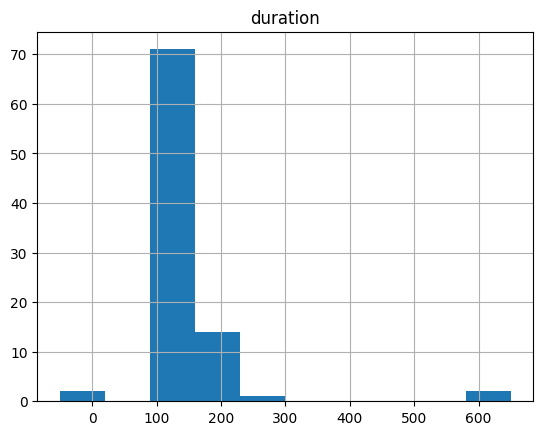

In [ ]:
imdb5.hist('duration')

In [ ]:
#I see values down by 0 and values very far away about central data, are outliers.
imdb5[(imdb5['duration']<10) | (imdb5['duration'] > 500)]

In [27]:
#I create the variable "media_duration"
media_duration = imdb4[(imdb4['duration']>=10) & (imdb4['duration'] <= 500)]['duration'].mean()
media_duration

149.09302325581396

In [120]:
imdb6 = imdb5.copy()

In [121]:
#I replacemente outliers values by "media_duration" in a new copy
#I would have also decided to delete them
imdb6.loc[(imdb6['duration']<10) | (imdb6['duration'] > 500), 'duration'] = media_duration

In [ ]:
#Other form that i can replace :
#imdb6['duration'] = np.where((imdb6['duration']<10) | (imdb6['duration'] > 500), media_duration, imdb6['duration'])

array([[<Axes: title={'center': 'duration'}>]], dtype=object)

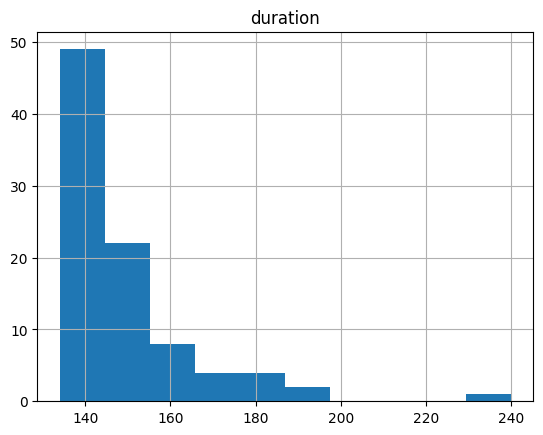

In [38]:
imdb6.hist('duration')

In [69]:
len(imdb6)

90

###If i had decided to delete them, the process would be next:

In [63]:
#I get the position of values that are outliers
index_delete = imdb6.loc[(imdb6['duration']<10) | (imdb6['duration'] > 500), 'duration'].index

In [64]:
#I delete these rows(inside "inder_delete" list)
imdb6.drop(index_delete, inplace=True)

In [122]:
#I reset the index with the changes
imdb6.reset_index(drop=True, inplace=True)

In [70]:
len(imdb6)

90

In [73]:
imdb6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         90 non-null     object 
 1   duration              90 non-null     float64
 2   gross                 90 non-null     float64
 3   genres                90 non-null     object 
 4   movie_title           90 non-null     object 
 5   title_year            90 non-null     int64  
 6   language              90 non-null     object 
 7   country               90 non-null     object 
 8   budget                90 non-null     float64
 9   imdb_score            90 non-null     float64
 10  actors                90 non-null     object 
 11  movie_facebook_likes  90 non-null     int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 8.6+ KB


#I inspect **genres** variable

###I see values of film genres together with each other, i will separate to them

In [44]:
imdb6['genres']

0             Biography|Comedy|Crime|Drama
1                  Action|Adventure|Sci-Fi
2     Crime|Drama|Mystery|Thriller|Western
3                                    Drama
4                        Adventure|Fantasy
                      ...                 
86                 Biography|Drama|History
87                            Comedy|Drama
88                Biography|Drama|Thriller
89                        Action|Drama|War
90           Biography|Drama|Music|Musical
Name: genres, Length: 90, dtype: object

In [123]:
#I separete the values of "genres" and put them in a list, i use "expand" for have
list_genres= imdb6['genres'].str.split('|', expand=True)
list_genres

,0,1,2,3,4
0,Biography,Comedy,Crime,Drama,None
1,Action,Adventure,Sci-Fi,None,None
2,Crime,Drama,Mystery,Thriller,Western
3,Drama,None,None,None,None
4,Adventure,Fantasy,None,None,None
...,...,...,...,...,...
85,Biography,Drama,History,None,None
86,Comedy,Drama,None,None,None
87,Biography,Drama,Thriller,None,None
88,Action,Drama,War,None,None


In [124]:
#I create a "for" loop for have new columns with the genres
for i in list_genres:
  imdb6['genre_'+str(i)]=list_genres[i]

In [96]:
#Check the values with new columns
imdb6.head(1)

,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes,genre_0,genre_1,genre_2,genre_3,genre_4
0,Martin Scorsese,240.0,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,None


In [125]:
# i will delete "genres" column because the values is a now column for each one
del(imdb6['genres'])

#Inspect **language** column

In [83]:
imdb6['language'].unique()

array(['English'], dtype=object)

In [126]:
#I see all values are same, i will delete them
del(imdb6['language'])

In [ ]:
imdb6.info()

#I inspect **country** column

In [98]:
#I see some values same, i will correct( USA = United States=usa)
imdb6['country'].value_counts()

country
USA               71
UK                 6
usa                3
France             2
Germany            1
New Zealand        1
India              1
United States      1
Australia          1
Czech Republic     1
Kyrgyzstan         1
Canada             1
Name: count, dtype: int64

In [127]:
#I standarized to uppercase and change "UNITED STATES" by "USA"
imdb6['country'] = imdb6['country'].str.upper()
imdb6['country']= np.where(imdb6['country']=='UNITED STATES','USA',imdb6['country'])
imdb6['country'].value_counts()

country
USA               75
UK                 6
FRANCE             2
GERMANY            1
NEW ZEALAND        1
INDIA              1
AUSTRALIA          1
CZECH REPUBLIC     1
KYRGYZSTAN         1
CANADA             1
Name: count, dtype: int64

#I inspect **actors** column

In [101]:
imdb6['actors'].value_counts()

actors
Aidan Turner,Adam Brown,James Nesbitt                   3
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson    2
Morgan Freeman,Ayelet Zurer,Moises Arias                2
Finn Wittrock,Jack O'Connell,Alex Russell               2
Leonardo DiCaprio,Matthew McConaughey,Jon Favreau       1
                                                       ..
Jennifer Lawrence,Peter Dinklage,Hugh Jackman           1
Patrick Fugit,Sela Ward,Emily Ratajkowski               1
Johnny Depp,Ruth Wilson,Tom Wilkinson                   1
Lesley Manville,Ruth Sheen,Karl Johnson                 1
Johnny Cannizzaro,Steve Schirripa,Scott Vance           1
Name: count, Length: 85, dtype: int64

In [128]:
#I will do the same that i did for my "genres" column
list_actors = imdb6['actors'].str.split(',', expand=True)

In [129]:
#Create new copy
imdb7= imdb6.copy()

In [130]:
for i in list_actors:
  imdb7['actor_'+str(i)]= list_actors[i]

In [140]:
imdb7.head(1)

,director_name,duration,gross,movie_title,title_year,country,budget,imdb_score,actors,movie_facebook_likes,genre_0,genre_1,genre_2,genre_3,genre_4,actor_0,actor_1,actor_2
0,Martin Scorsese,240.0,116866727.0,The Wolf of Wall Street,2013,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000,Biography,Comedy,Crime,Drama,None,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau


#Inspect **imdb_score** column

In [132]:
imdb7['imdb_score'].unique()

array([ 8.2,  7.2,  7.9,  6.5,  6.9,  8.1, -7.5,  8.6,  8. ,  8.5,  5.7,
        7.5,  7.6,  7.4,  6.7,  6.3,  7. ,  6.1,  6.8,  8.4,  8.8,  4.3,
        7.1,  7.3,  7.8,  3. ,  6. ,  5.8,  5.3,  6.4,  6.6, -1.2,  5.9,
        8.7])

array([[<Axes: title={'center': 'imdb_score'}>]], dtype=object)

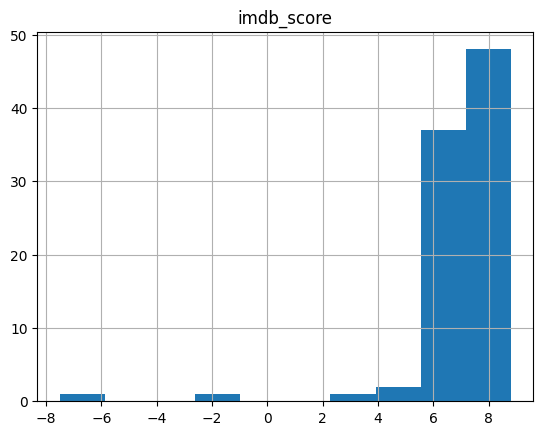

In [133]:
#I see negative values
imdb7.hist('imdb_score')

In [135]:
#In a previous case, i replaced the negative values with the average, this time i will eliminate them
imdb7.drop(imdb7[imdb7['imdb_score']<0].index, inplace=True)

# I inspect **movie_facebook_likes**

In [136]:
imdb7['movie_facebook_likes'].unique()

array([138000,  95000, 114000,      0,  83000, 197000, 166000,    434,
       123000, 349000,  76000,  92000, 199000,  56000, 164000,  65000,
       144000,  39000,  17000, 190000,  46000,  86000,     58,  51000,
        71000,  48000, 146000,  82000,   5000, 175000,  18000,  85000,
        72000,  75000,  28000,  44000,  27000,  54000,  41000, 118000,
        80000, 115000,     33,  55000, 140000,  13000,  47000,  26000,
        94000,  77000,  49000,  10000,  11000,  63000,  64000,  53000,
        24000,  68000,  16000,  38000,  35000,  58000,  33000,  31000])

array([[<Axes: title={'center': 'movie_facebook_likes'}>]], dtype=object)

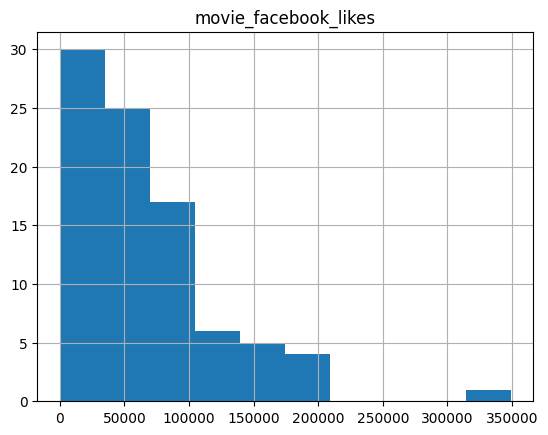

In [137]:
#I see a outlier
imdb7.hist('movie_facebook_likes')

In [143]:
#I delete values greater than 300000 and i reset index
imdb7.drop(imdb7[imdb7['movie_facebook_likes']>300000].index, inplace=True)
imdb7.reset_index(drop=True, inplace=True)

In [144]:
imdb7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         87 non-null     object 
 1   duration              87 non-null     float64
 2   gross                 87 non-null     float64
 3   movie_title           87 non-null     object 
 4   title_year            87 non-null     int64  
 5   country               87 non-null     object 
 6   budget                87 non-null     float64
 7   imdb_score            87 non-null     float64
 8   actors                87 non-null     object 
 9   movie_facebook_likes  87 non-null     int64  
 10  genre_0               87 non-null     object 
 11  genre_1               81 non-null     object 
 12  genre_2               62 non-null     object 
 13  genre_3               22 non-null     object 
 14  genre_4               6 non-null      object 
 15  actor_0               87 